
# Integrais en dúas dimensións


In [1]:
import time
print(' Última execución  ', time.asctime() )

 Última execución   Fri Mar  7 13:56:46 2025


*Nota*

Para que este notebook funcione en colab, precisamos <a href = "https://www.dropbox.com/scl/fi/wwz2w43kqj0s38gm87roj/graph_utils.py?rlkey=rppkwu9tmbnnsojezzj69p1r0&dl=1"> graph_utils.py</a>. Podes descargalo premendo na ligazón, e subilo a colab:


<img src="https://www.dropbox.com/scl/fi/b35vcated0f9lwrw4jy01/colab_upload.jpg?rlkey=l1ag15r0ovkg2dsefze117k1y&raw=1" width=200 align="center" />

In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import graph_utils as gf

### Estrutura do tema

- Introdución 

- Integral 2D

- Teorema de Fubini 

  - Principio de Cavalieri
  
- Integrais en rexións non rectangulares 

- Cambio de variables. Xacobiano

  - Exemplo de cambio a polares 


### Obxectivos

 Ampliar o concepto de integral de Riemann en dúas dimensións

 Teorema de Fubini: a integral non depende da orde de integración

 Principio de Cavilieri.

 Integrais en rexións non rectangulares.

 Cambio de variables, polares.

 Amosar algúns exemplos sinxelos



## Introdución

###  Recordatorio da suma de Riemann

 Para calcular a *área* baixo unha curva dunha función real, $f(x)$, e o eixe $y=0$ nun intervalo $[a, b]$, introducimos a integral unidimensional.

 Definímola a partir da **suma de Riemann**. Dada a partición dun intervalo, e dunha función, acoutada e continua no devandito intervalo, damos a suma de Riemann como:

 $$
\mathcal{S}(f, \mathcal{P}) = \sum_{i=1, n} f(x'_i) (x_i - x_{i-1})  
$$


 onde $x'_i$ é un valor aleatorio entre os valores $[x_{i-1}, x_{i}]$



Tamén definimos a suma de Riemann superior como:

$$
\mathcal{U}(f, \mathcal{P}) = \sum_{i=1, n} f(x'_i) (x_i - x_{i-1})  
$$

onde agora $x'_i$ é o valor do intervalo $[x_i, x_{i-1}]$ onde a función $f(x)$ é *máxima* .

Tamén definimos a suma inferior de Riemann como:

$$
\mathcal{L}(f, \mathcal{P}) = \sum_{i=1, n} f(x'_i) (x_i - x_{i-1})  
$$

onde agora $x'_i$ é o valor do intervalo $[x_i, x_{i-1}]$ onde a función $f(x)$ é *mínima* .


A función tiña unha integral no intervalo $[a, b]$ se para particións cada vez máis finas, as tres sumas de Riemann converxían a un determinado valor, a integral.

 $$
 \int_a^b \, f(x) \, \mathrm{d}x
 $$

 Lembra que sempre é verdade:

 $$
 \mathcal{L}(f, \mathcal{P}) \le \mathcal{S}(f, \mathcal{P}) \le \mathcal{U}(f, \mathcal{P})
 $$



## Integrais 2D

 Coñecemos a área entre a súa gráfica dunha función real, $f(x)$, nun intervalo, $[a, b], $e o eixe $x$, corresponde á súa integral definida:

 $$
 \mathcal{A} = \int_a^b \, f(x) \,\mathrm{d}x
 $$

 O volume baixo a gráfica dunha función escalar, $f(x, y)$, definida nunha rexión, $[a, b]\times [c, d]$ e o plano $(x, y)$, corresponden á integral definida en dúas dimensións:

 $$
 \mathcal{V} = \int_a^b \int_c^d \, f(x, y) \,\mathrm{d}x \mathrm{d} y
 $$



Preguntámonos agora cal é o volume baixo a gráfica da función $f(x, y)$ e do plano $(x, y)$. Sexa $f(x, y) = 2 - x^2 - y^2$ e a base dada por $[-1, 1] \times [-1, 1]$


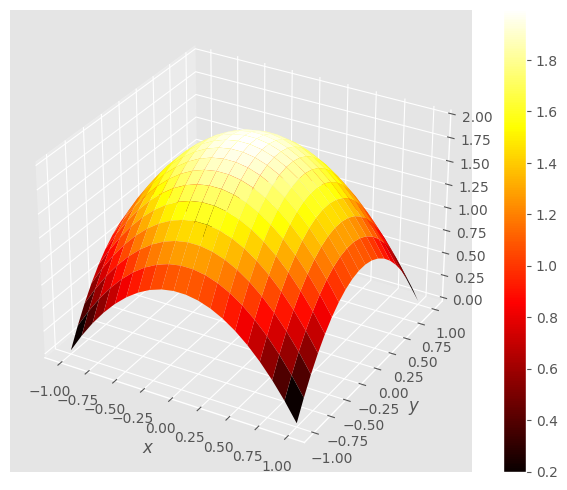

In [3]:
fun = lambda x, y : 2- x*x - y*y
gf.graph(fun, (-1., 1., 20), (-1., 1., 20));

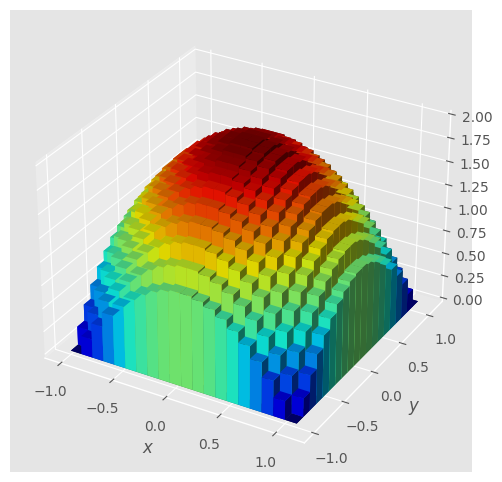

In [4]:
gf.bars3d(fun, (-1., 1., 20), (-1., 1., 20));


Podemos estender a **suma de Riemann** á función escalar bidimensional, $f(x, y)$ na rexión $[a, b] \times [c, d]$, a partir da partición dos intervalos $[ a, b], \,[c, d]$

$$
\mathcal{S}(f, \mathcal{P}) = \sum_{i=1}^n \sum_{j = 1}^m \, f(x'_i, y'_j) \, \Delta x_i \, \Delta y_j 
$$

 onde $(x'_i, y'_j)$ é un valor aleatorio entre os valores $[x_{i-1}, x_{i}]$ e $[y_{j-1}, y_{j} ]$ , e $\Delta x_i = x_i - x_{i-1}, \, \Delta y_j = y_j - y_{j-1}$

 Así mesmo, definimos a **suma de Riemann superior e inferior** , e definimos a integral se para particións cada vez máis finas, as sumas de Riemann converxen a un determinado valor, a integral:

 $$
 \int_a^b \int_c^d \, f(x, y) \, \mathrm{d}x \mathrm{d}y
 $$


In [5]:
a = gf.riemann_sum(fun, (-1., 1., 100), (-1., 1., 100))
print('Summa de Riemann = ', a, ', integral =', 16./3.);

Summa de Riemann =  5.386655728457595 , integral = 5.333333333333333



Nótese que a notación da integral lembra a definición da suma de Riemann.

$$
\mathcal{S}(f, \mathcal{P}) = \sum_{i=1}^n \sum_{j = 1}^m \, f(x'_i, y'_j) \; (x_i - x_{i-1}) \; (y_j - y_{j-1}) 
$$

$$
\int_a^b \int_c^d \, f(x, y) \, \mathrm{d}x \mathrm{d}y
$$

$$
\sum \to \int, \;\;\; \Delta x_i = x_i - x_{i-1} \to \mathrm{d}x, \;\;\; \Delta y_j = y_j - y_{j-1} \to \mathrm{d}y,
$$


 Hai que ter en conta que as variables de integración son *mudas*, as únicas variables son os límites de integración $[a, b] \times [c, d]$.



## Teorema de Fubini

 Indícanos que se unha función, $f(x, y)$, é integrable nunha rexión $[a, b] \times [c, d]$, podemos integrar na orde que consideremos.

$$
\int_a^b \int_c^d f(x, y) \, \mathrm{d}x \mathrm{d}y = \int_a^b \left[ \int_c^d \, f(x, y) \, \mathrm{d}y \right] \mathrm{d}x = \int_c^d \left[ \int_a^b \, f(x, y) \, \mathrm{d}x \right] \mathrm{d}y
$$


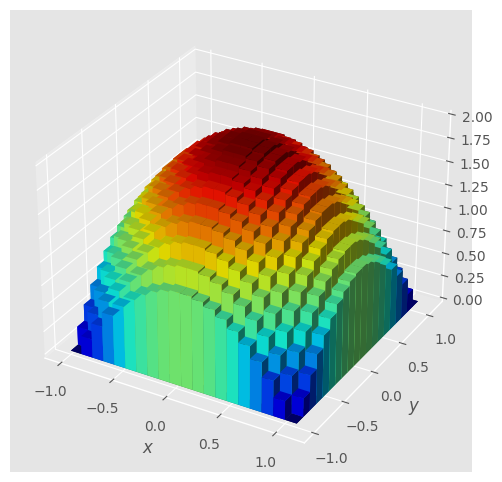

In [6]:
Aa = gf.bars3d(fun, (-1., 1., 20), (-1., 1., 20))


Podemos ver que o valor entre corchetes corresponde á área para un determinado valor fixo de $x$ ou $y$

$$
\mathcal{A}(x) =  \int_c^d \, f(x, y) \, \mathrm{d}y , \;\;\; \mathcal{A'}(y)=  \int_a^b \, f(x, y) \, \mathrm{d}x 
$$

Entón:

$$
\int_a^b \int_c^d f(x, y) \, \mathrm{d}x \mathrm{d}y = \int_a^b \mathcal{A}(x) \, \mathrm{d}x = \int_c^d \mathcal{A'}(y) \, \mathrm{d}y
$$


Isto é:

$$
\int_a^b \int_c^d f(x, y) \, \mathrm{d}x \mathrm{d}y = \int_a^b \left[ \int_c^d \, f(x, y) \, \mathrm{d}y \right] \mathrm{d}x = \int_c^d \left[ \int_a^b \, f(x, y) \, \mathrm{d}x \right] \mathrm{d}y
$$


*Exercicio* : Integra $f(x, y) = x$ no cadrado $[0, 1] \times [0, 1]$.


1/2

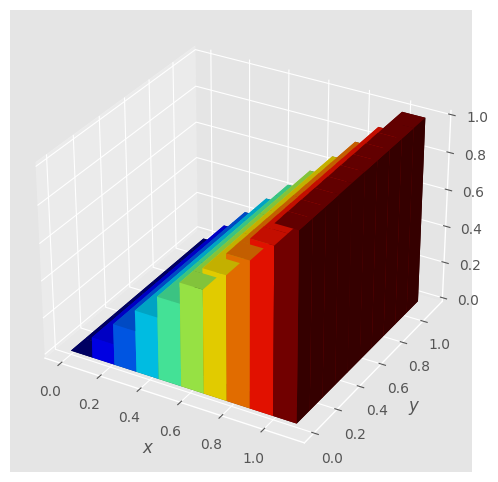

In [7]:
fun = lambda x, y : x
gf.bars3d(fun, xrange = (0, 1, 10), yrange = (0, 1, 10), acolor = 'x');
from sympy import *
x,y = symbols('x y')
integrate(x,[x,0,1],[y,0,1])


*Exercicio* : Integra a función $f(x, y) = y^2 \sin(x)$ na rexión $[0, \pi] \times [0, \pi]$


2*pi**3/3

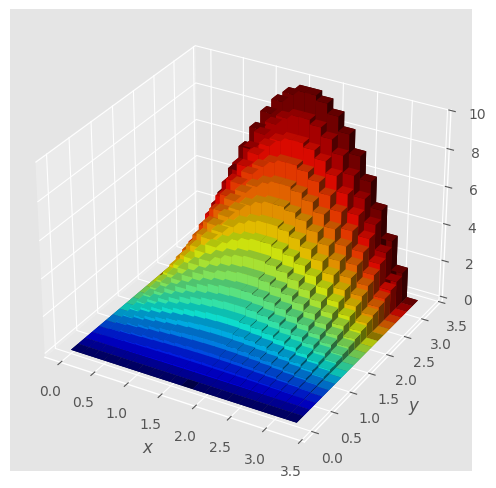

In [8]:
fun = lambda x, y : y * y * np.sin(x)
gf.bars3d(fun, xrange = (0, np.pi, 20), yrange = (0, np.pi, 20), acolor = 'y');
integrate(y*y*sin(x),[x,0,pi],[y,0,pi])


#### Principio de Cavalieri.

 Para corpos de revolución, obtidos facendo xirar unha figura arredor dun eixe.

 *Exercicio* : Calcula o volume dun cono formado facendo xirar o triángulo que ten dous lados iguais, como na figura.


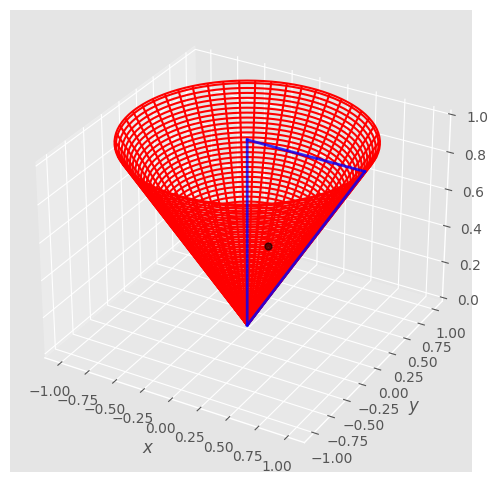

In [9]:
zrange, phirange = (0., 1., 100), (0., 2.*np.pi, 100)
xfun = lambda z, phi : z  * np.cos(phi)
yfun = lambda z, phi : z  * np.sin(phi)
zfun = lambda z, phi : z 
fig,ax = gf.wfsurface(xfun, yfun, zfun, zrange, phirange);
phi = 0.*np.pi/2.
trange = (0., 1., 10)
gf.line3d(lambda t: xfun(t, phi), lambda t: yfun(t, phi), lambda t: zfun(t, phi), trange, newfig = [fig,ax]);
gf.line3d(lambda t: xfun(t, phi), lambda t: yfun(t, phi), lambda t: zfun(1.,phi), trange, newfig = [fig,ax]);
gf.line3d(lambda t: 0.*t        , lambda t: 0.*t        , lambda t: zfun(t, phi), trange, newfig = [fig,ax]);
ax.plot([0.], [1/3.], [1/3.], markerfacecolor='k', markeredgecolor='k', marker='o', markersize=5, alpha=0.6)
## AREA IS 1/3*pi*h*r**2, 2*pi*centroid_radius*area_triangle

*Explorar* : Considera que para un determinado $z$, o raio máximo é $z^2$, como sería a figura?

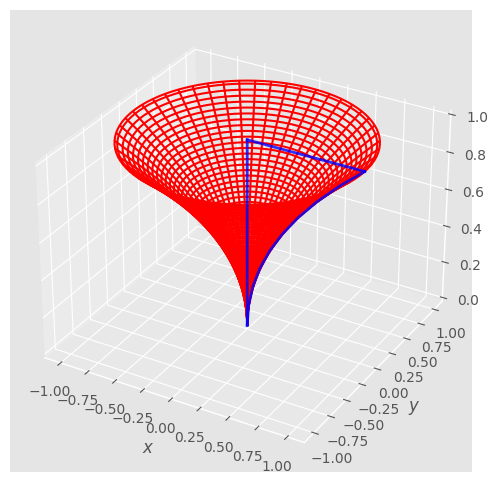

In [10]:
zrange, phirange = (0., 1., 100), (0., 2.*np.pi, 100)
xfun = lambda z, phi : z*z  * np.cos(phi)
yfun = lambda z, phi : z*z  * np.sin(phi)
zfun = lambda z, phi : z 
fig,ax = gf.wfsurface(xfun, yfun, zfun, zrange, phirange);
phi = 0.*np.pi/2.
trange = (0., 1., 10)
gf.line3d(lambda t: xfun(t, phi), lambda t: yfun(t, phi), lambda t: zfun(t, phi), trange, newfig = [fig,ax]);
gf.line3d(lambda t: xfun(t, phi), lambda t: yfun(t, phi), lambda t: zfun(1.,phi), trange, newfig = [fig,ax]);
gf.line3d(lambda t: 0.*t        , lambda t: 0.*t        , lambda t: zfun(t, phi), trange, newfig = [fig,ax]);

<img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiWfcH880DXxljWDqOPAv-qQK3sCnCyFjYkw2z8KXSrY7i_xhnipYTuOnNMNEcoUZjw2EzjrPcoBR2Tim1NcMLB4QYRg2K1a0EgUDF00J7MpmiZX70y7q8Pmln2TzJPkGhl_lABq1ExBgKaHsmUXm3VqTW5Nknccve3BGFgCh5JKnEj-r171bmi8SSs/s752/o-principio-de-cavalieri.png" width=800 align="center" />


## Integración nunha rexión non rectangular.

 Considera que queremos integrar unha función, $f(x, y)$, na rexión, $R$, non necesariamente un rectángulo, por exemplo no seguinte triángulo:


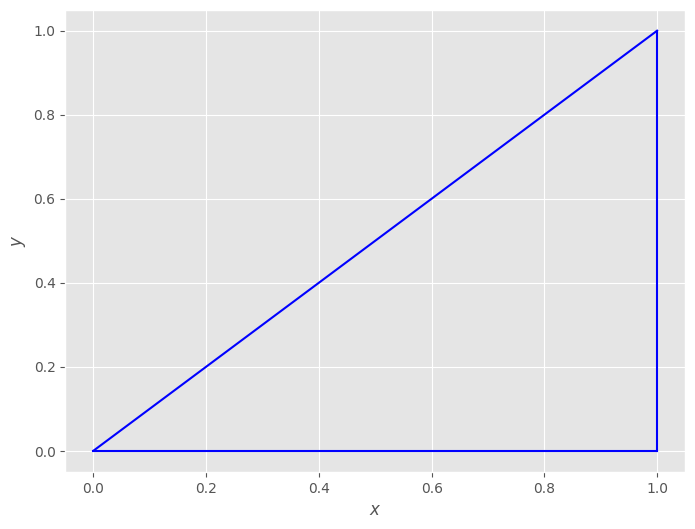

In [11]:
fx  = lambda t: t
fy0 = lambda t: 0. + 0.*t
fy1 = lambda t: t
trange = (0., 1, 10)
gf.line2d(fx, fy0, trange)
gf.line2d(fx, fy1, trange, newfig=False);
gf.line2d(lambda t: 1 + 0.*t, lambda t: t, trange, newfig=False);


Podemos definir a rexión como os puntos que cumpren

 $$
 { 0 \le x \le 1, \;\; 0 \le y \le x }
 $$

 E a integral sería:

 $$
 \int \int_{R} f(x, y) \, \mathrm{d}x \mathrm{d}y = \int_0^1 \left[ \int_0^xf(x, y) \, \mathrm{d }y \right] \mathrm{d}x
 $$

 As dúas variables xa non son independentes, con esta definición a variable $y$ depende do $x$. Dado un valor de $x$, o intervalo de integración para $y$ é $[0, x]$.


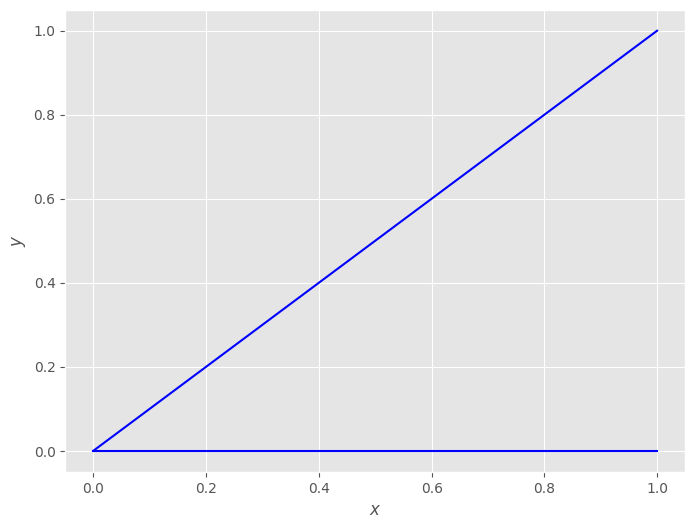

In [12]:
fx  = lambda t: t
fy0 = lambda t: 0. + 0.*t
fy1 = lambda t: t
trange = (0., 1, 10)
gf.line2d(fx, fy0, trange)
gf.line2d(fx, fy1, trange, newfig=False);
#gf.line2d(lambda t: 1 + 0.*t, lambda t: t, trange, newfig=False);


Ou en función de $y$

 $$
 { 0 \le y \le 1, \;\; y \le x \le 1 }
 $$

 A integral queda:

$$
\int \int_{R} f(x, y) \, \mathrm{d}x \mathrm{d}y = \int_0^1 \left[ \int_{y}^1 f(x, y) \, \mathrm{d}x \right] \mathrm{d}y
$$


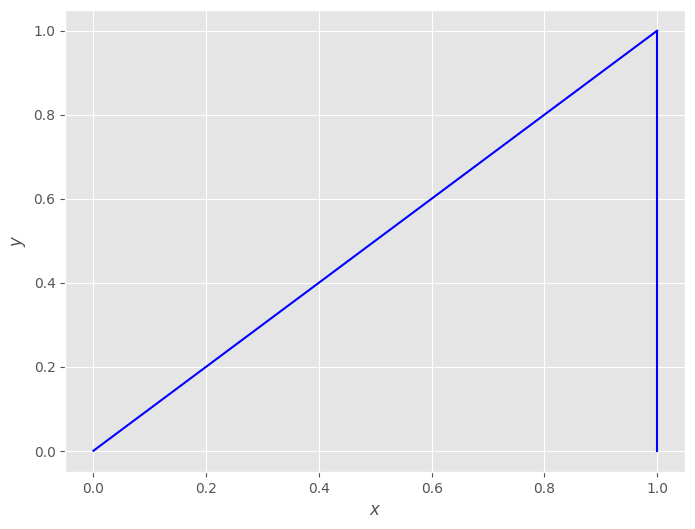

In [13]:
fy  = lambda t: t
fx0 = lambda t: t
fx1 = lambda t: 1 + 0.*t
trange = (0., 1, 10)
gf.line2d(fx0, fy, trange)
gf.line2d(fx1, fy, trange, newfig=False);


*Exercicio* : Calcula a integral de $f(x, y) = 1$ no triángulo anterior. A que corresponde?


de tipo I:
    
$$
\int_0^1 \left[ \int_0^x \, \mathrm{d}y \right] \mathrm{d}x = \int_0^1 \left. y \right|_0^x \mathrm{d}x  = \int_0^1 x \, \mathrm{d}x  = \left. \frac{x^2}{2} \right|_0^1 = \frac{1}{2}
$$

de tipo II:
    
$$
\int_0^1 \left[ \int_y^1 \, \mathrm{d}x \right] \mathrm{d}y = \int_0^1 \left. x \right|_y^1 \mathrm{d}y  = \int_0^1 (1-y) \, \mathrm{d}y  = \left. \left( y - \frac{y^2}{2} \right) \right|_0^1 = \frac{1}{2}
$$


En xeral, se queremos integrar a función $f(x, y)$ nunha rexión $R$, primeiro debemos definila.

 tipo I:

$$
\{ a \le x \le b, \;\; \phi_0(x) \le y \le \phi_1(x) \}
$$


 Onde $\phi_0 (x)$ e $\phi_1(x)$ son dúas funcións reais que para un valor de $x$ dan os extremos do intervalo no que integramos $y$.



ou tipo II:

 $$
 { c \le y \le d, \;\; \xi_0(y) \le x \le \xi_1(y) }
 $$

 Algunhas rexións admiten ambos tipos de definicións.



Se a rexión, $R$, é de tipo I, a integral é:

 $$
\int_R f(x, y) \, \mathrm{d}x \mathrm{d} y = \int_a^b \left[ \int_{\phi_0(x)}^{\phi_1(x)} f(x, y) \, \mathrm{d}y \right] \mathrm{d}x
$$


 Mentres que se é tipo II:

$$
\int_R f(x, y) \, \mathrm{d}x \mathrm{d} y = \int_c^d \left[ \int_{\xi_0(y)}^{\xi_1(y)} f(x, y) \, \mathrm{d}x \right] \mathrm{d}y
$$



No exemplo anterior do triángulo, definido como tipo I:

 $$
 \phi_0(x) = 0, \;\; \phi_1(x) = x
 $$

 definido como tipo II:

 $$
 \xi_0(y) = y, \;\; \xi_1(y) = 1
 $$



*Exercicio* : Calcula a integral $f(x, y) = y $, no triángulo, ${0 \le x \le 1, \; 0 \le y \le x }$.


1/6

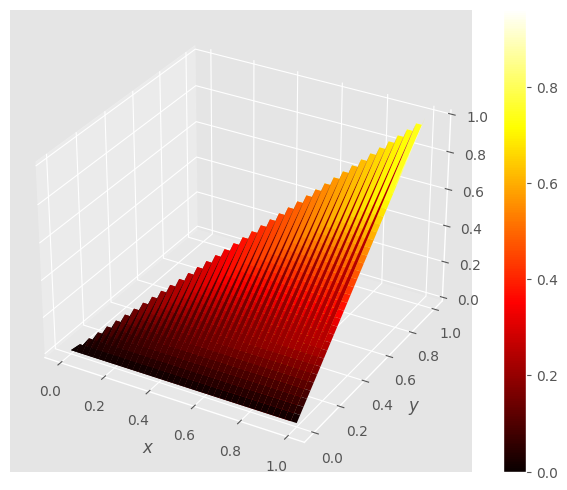

In [14]:
fun = lambda x, y : y
condition = lambda x, y : y <= x
gf.graph(fun, (0, 1, 40), (0, 1, 40), condition);
integrate(y,[y,0,x],[x,0,1])


*Exercicio*

 Define a rexión dada polo cuarto do disco de raio $a$ no primeiro cuadrante.


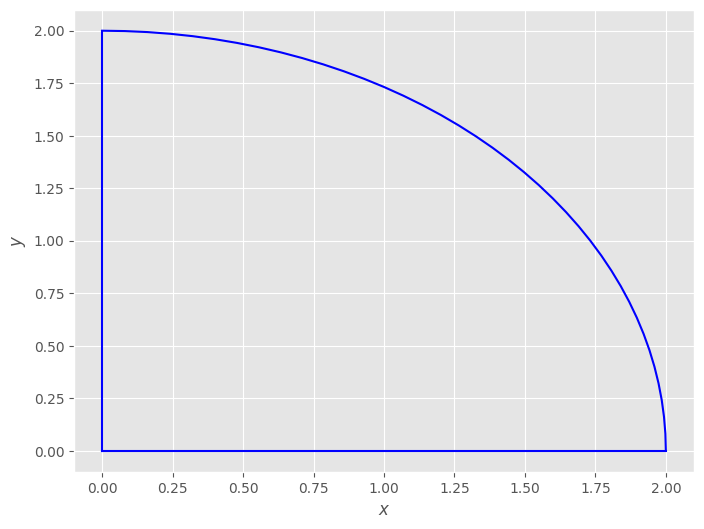

In [15]:
a      = 2.
trange = (0., np.pi/2, 40)
gf.line2d(lambda t: a*np.cos(t), lambda t: 0.*t       , trange)
gf.line2d(lambda t: a*np.cos(t), lambda t: a*np.sin(t), trange, newfig = False)
gf.line2d(lambda t: 0.*t       , lambda t: a*np.sin(t), trange, newfig = False);

Tipo I, a rexión defínese como:

$$
\{ 0 \le x \le a, \;\; 0 \le y \le \sqrt{a^2 - x^2} \}
$$

e tipo II:

$$
\{ 0 \le y \le a, \;\; 0 \le x \le \sqrt{a^2 - y^2} \}
$$


Se quixesemos calcular a integral da función, $f(x, y) = \sqrt{a^2 - y^2}$, é máis conveniente definir a rexión de tipo II.

 $$
 \int \int_{R} \sqrt{a^2 - y^2} \mathrm{d}x\mathrm{d} y = \int_0^a \left[ \int_0^{\sqrt{a^2-y ^2}} \sqrt{a^2 - y^2} \mathrm{d}x \right] \mathrm{d}y
 $$


$$
\int_0^a \left. \sqrt{a^2 - y^2} \, x  \right|_0^{\sqrt{a^2-y^2}} \mathrm{d}y = 
\int_0^a (a^2 - y^2) \, \mathrm{d}y = \left. a^2 y - \frac{y^3}{3} \right|_0^a = \frac{2 a^3}{3}
$$

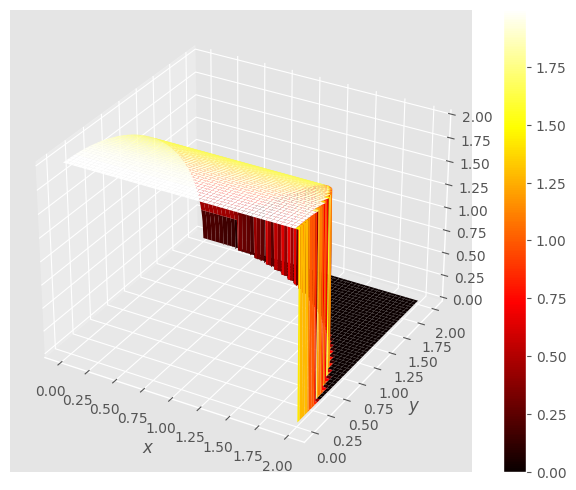

In [16]:
a = 2.
rrange = (0., a, 200)
cond   = lambda x, y: np.sqrt(x*x + y*y) <= a
fun    = lambda x, y: np.sqrt(a*a - y*y)
gf.graph(fun, rrange, rrange, cond);


## Cambio de variables. Xacobiano

 No caso anterior pode ser máis conveniente realizar a integral en coordenadas polares. Como se integra despois de cambiar as coordenadas?

 Observa nas seguintes figuras como a rexión dunha sección do anel de raio $[0.5, 1]$ e ángulo $[0, \pi/2]$ é unha rexión rectangular en $(r, \phi)$.

 Non obstante, as particións rectangulares en $(r, \phi)$ transfórmanse en polígonos no plano $(x, y)$.

 Para integrar cómpre calcular o volume dos prismas da summa de Riemann que teñen de base aqueles polígonos (que ao facer as particións máis pequenas se converten en paralelogramos), cunha área que vén dada polos dous vectores que definen os seus lados.

 Nas seguintes celas mostramos como se transforman os vectores nas particións ao cambiar as coordenadas.


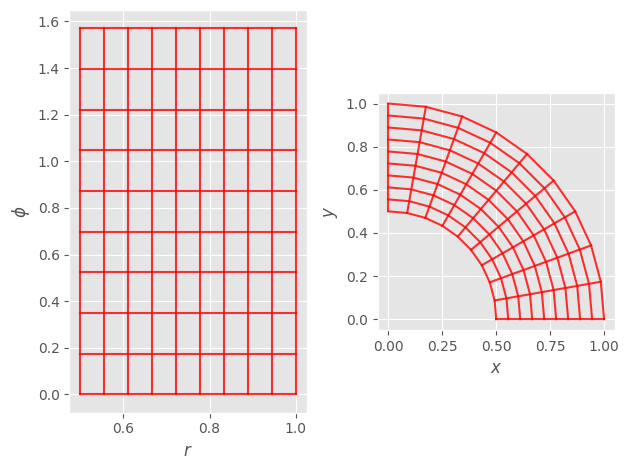

In [17]:
rsrange, phisrange = (0.5, 1, 10), (0., np.pi/2, 10)
rfun = lambda r, phi : r
pfun = lambda r, phi : phi
xfun = lambda r, phi : r * np.cos(phi)
yfun = lambda r, phi : r * np.sin(phi)
plt.subplot(1, 2, 1)
gf.wfsurface2d(rfun, pfun, rsrange, phisrange, newfig=False, xlabel='$r$', ylabel="$\phi$");
plt.subplot(1, 2, 2)
gf.wfsurface2d(xfun, yfun, rsrange, phisrange, newfig=False);
plt.gca().set_aspect(aspect = 1.); plt.tight_layout();

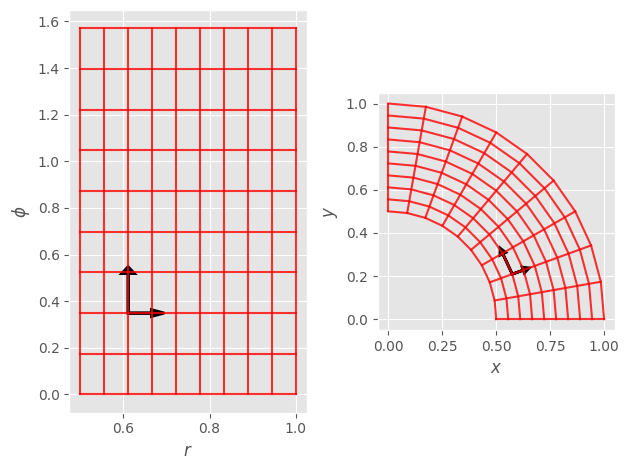

In [18]:
i, j = 2, 2
rs, phis = np.linspace(*rsrange), np.linspace(*phisrange)
plt.subplot(1, 2, 1)
gf.wfsurface2d(rfun, pfun, rsrange, phisrange, newfig=False, xlabel='$r$', ylabel="$\phi$");
ri, pj, dri, dpj = rs[i], phis[j], rs[i+1] - rs[i], phis[j+1] - phis[j]
gf.arrow(ri, pj, dri,  0., head = 0.03);
gf.arrow(ri, pj, 0. , dpj, head = 0.03);
plt.subplot(1, 2, 2)
x0, y0 = xfun(ri      , pj)      , yfun(ri      , pj)
x1, y1 = xfun(ri + dri, pj)      , yfun(ri + dri, pj)
x2, y2 = xfun(ri      , pj + dpj), yfun(ri      , pj+dpj)
gf.wfsurface2d(xfun, yfun, rsrange, phisrange, newfig=False);
gf.arrow(x0, y0, x1 - x0, y1 - y0, head = 0.03);
gf.arrow(x0, y0, x2 - x0, y2 - y0, head = 0.03);
plt.gca().set_aspect(aspect = 1.); plt.tight_layout();


A área de cada unha das rexións do plano $(x, y)$ vén dada polo produto vectorial dos vectores dos seus lados.

 Consideremos un cambio de variables $(u, v) \to (x, y)$. O vector entre $(u_0, v_0)$ e $(u_0 + \Delta u, v_0)$ - un dos lados dos rectángulos en $(u, v)$ -, transfórmase no vector semellante que corresponde a un dos lados do polígono en $(x,y)$:

 $$
 \left (x(u_0+\Delta u, v_0) - x(u_0, v_0), \;\; y(u_0+\Delta u, v_0) - y(u_0, v_0)\right)
 $$

 E como o cambio é diferenciable:

$$
\left(\frac{\partial x}{\partial u}(u_0, v_0) \, \Delta u, \;\; \frac{\partial y}{\partial u} (u_0, v_0) \, \Delta u \right)
$$

 Do mesmo xeito, o vector $(u_0, v_0 + \Delta v) - (u_0, v_0)$, o outro lado do rectángulo en $(u, v)$, transfórmase no vector, o outro lado en $(x, y)$:

$$
\left(\frac{\partial x}{\partial v}(u_0, v_0) \, \Delta v, \;\; \frac{\partial y}{\partial v} (u_0, v_0) \, \Delta v \right)
$$


Os vectores dos lados nun espazo $(x, y)$ son

$$
\left( \frac{\partial x}{\partial u}, \, \frac{\partial y}{ \partial u} \right) \Delta u, \;\; 
\left( \frac{\partial x}{\partial v}, \, \frac{\partial y}{ \partial v} \right) \Delta v \;\; 
$$

E a área que soportan vén dada polo valor absoluto do seu produto vectorial:

$$
\left| \begin{array}{cc} \frac{\partial x}{ \partial u} & \frac{\partial x}{\partial v} \\ 
\frac{\partial y}{ \partial u} & \frac{\partial y}{\partial v} 
\end{array} \right| \Delta u \Delta v
$$



Onde,

$$
J = \left| \begin{array}{cc} \frac{\partial x}{\partial u} & \frac{\partial x}{\partial v} \\ 
\frac{\partial y}{ \partial u} & \frac{\partial y}{\partial v} 
\end{array} \right|
$$

É o determinante da matriz xacobiana, ou xacobiana.

 Dado que o diferencial de área sempre ten que ser positivo, tomaremos o valor absoluto do xacobiano!



Así, cando cambiamos de coordenadas

$$
\int_R f(x, y) \, \mathrm{d}x \mathrm{d}y = \int_{R'} f(u, v) \, |J| \, \mathrm{d}u \mathrm{d} v
$$

onde $R'$ é a rexión definida no espazo ($u, v$), $f(u, v) = f(x(u, v), y(u, v)) $ é a función no novo coordenadas e, finalmente, a diferencial de área vén dada por:

$$
\mathrm{d}x \mathrm{d} y \to |J| \mathrm{d} u \mathrm{d}v,
$$

onde $|J|$ é o valor absoluto do xacobiano do cambio de variables.


*Exercicio* : Calcula a integral do anel comprendido entre os raios $[a, b]$ do primeiro cuadrante da función $f(x, y) = 1$ e da función $f(x, y) = \log ( x^2 + y^2)$


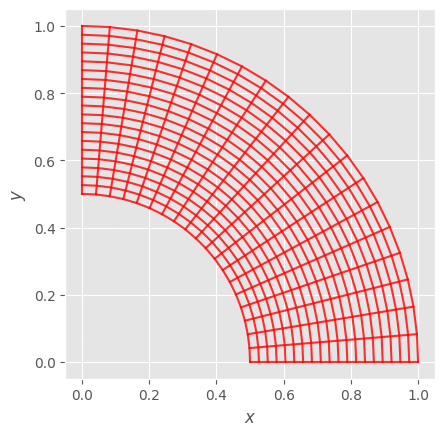

In [19]:
rsrange, phisrange = (0.5, 1, 20), (0., np.pi/2, 20)
xfun = lambda r, phi : r * np.cos(phi)
yfun = lambda r, phi : r * np.sin(phi)
gf.wfsurface2d(xfun, yfun, rsrange, phisrange);
plt.gca().set_aspect(aspect = 1.);

O cambio a polares é:

$$
x(r, \phi) = r \cos \phi, \;\; y(r, \phi) = r \sin \phi
$$

O xacobiano do cambio a polares é:
 
$$
\left| \begin{array}{cc} \cos \phi & - r \sin \phi\\ 
\sin \phi & r \cos \phi \end{array} \right| = r (\cos^2 \phi + \sin^2 \phi) = r
$$

 Observa a seguinte imaxe, en cada paralelogramo, un dos lados é $\mathrm{d}r$ e o outro $r \, \mathrm{d}\phi$. Polo tanto, o diferencial de área é:

$$
r \mathrm{d}\phi \mathrm{d} r
$$


A rexión de integración defínese en polares:

$$
\{ a \le r \le b, \; 0 \le \phi \le \pi/2\}
$$

O xacobiano do cambio de coordenadas, que calculamos antes, é: $J = r$

para $f(x, y) = 1$ a integral é:

$$
\int_a^b \int_0^{\pi/2} r \mathrm{d}r \mathrm{d}\phi = \left. \frac{r^2}{2} \right|_a^b \phi \big|_0^{\pi/2} = \frac{\pi}{4} (b^2 -a^2) 
$$

 que equivale á área dun cuarto do anel.



A función, $f(x, y) = \log(x^2 + y^2)$, en polares é $f(r, \phi) = 2 \log r$. A integral na sección do anel

 $$
 \int_a^b \int_0^{\pi/2} (2 \log r) \, r \mathrm{d}r \mathrm{d}\phi
 $$



A integral en $\phi$ é simplemente $\pi/2$

 A integral en $r$ resólvese por anacos:

 $$
 \int 2 r \log r \, \mathrm{d} r= r^2 \log r - \int r \mathrm{d}r = r^2 \log r - \frac{r^2}{2}
 $$

 Entón a integral completa é:

 $$
 \int_a^b \int_0^{\pi/2} 2 r \log r \, \mathrm{d}r \mathrm{d}\phi
 = \frac{\pi}{2} \left( b^2 \log b - \frac{b^2}{2} - a^2 \log a + \frac{a^2}{2} \right )
 $$



A seguinte figura mostra a rexión de integración e a gráfica da función a integrar na rexión.


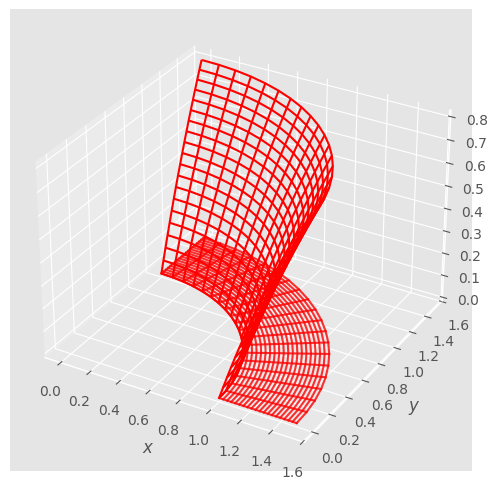

In [20]:
rrange, phirange = (1., 1.5, 20), (0, np.pi/2, 20)
xfun = lambda r, phi : r * np.cos(phi)
yfun = lambda r, phi : r * np.sin(phi)
zfun = lambda r, phi : 2 * np.log(r)
gf.wfsurface  (xfun, yfun, zfun, rrange, phirange);
gf.wfsurface2d(xfun, yfun      , rrange, phirange, newfig = False);